# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

# LGMVIP June-22

# AUTHOR - Srabosti Dutta

# TASK2 - Stock Market Prediction and Forecasting using LSTM


**Dataset Link: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
#Sort the dataset according to the date
data['Date']=pd.to_datetime(data['Date'])
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


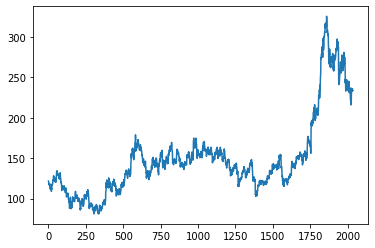

In [ ]:
plt.plot(df['Close'])

In [ ]:
df1=df['Close']

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size

train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [ ]:
training_size,test_size

(1424, 611)

In [ ]:
#convert an array of values into a dataset matrix
def  datasetCrtd(dataset, time_step=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
time_step=100
X_train, y_train=datasetCrtd(train_data, time_step)
X_test,ytest=datasetCrtd(test_data, time_step)

In [ ]:
print(X_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
#Reshape input which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 10s 236ms/step - loss: 0.0101 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 3s 165ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 5s 289ms/step - loss: 9.8137e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 4s 221ms/step - loss: 8.1689e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 166ms/step - loss: 7.8637e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 167ms/step - loss: 7.7175e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 3s 164ms/step - loss: 7.5492e-04 - val_loss: 9.8403e-04
Epoch 8/60
19/19 [==============================] - 3s 163ms/step - loss: 7.2673e-04 - val_loss: 9.5264e-04
Epoch 9/60
19/19 [==============================] - 3s 164ms/step - loss: 7.2281e-04 - val_loss: 9.5133e-04
Epoch 10/60
19/19 [==============================] - 3s 165

In [ ]:
#Prediction of scaled test set
test_predict=model.predict(X_test)

In [ ]:
#transform tooriginal test set
test_predict1 = scaler.inverse_transform(test_predict)

In [ ]:
test_predict1

array([[141.4323  ],
       [141.54297 ],
       [140.61577 ],
       [137.86714 ],
       [136.04642 ],
       [135.70682 ],
       [137.28877 ],
       [139.21739 ],
       [139.5617  ],
       [138.70695 ],
       [138.01744 ],
       [139.16487 ],
       [140.3544  ],
       [142.14978 ],
       [144.40947 ],
       [142.37843 ],
       [139.34467 ],
       [138.6943  ],
       [139.80869 ],
       [145.3941  ],
       [150.3969  ],
       [152.26085 ],
       [151.64304 ],
       [148.89569 ],
       [148.51436 ],
       [149.01274 ],
       [150.08502 ],
       [151.98624 ],
       [152.64897 ],
       [152.22498 ],
       [152.18582 ],
       [151.01564 ],
       [147.82841 ],
       [142.0989  ],
       [138.49359 ],
       [137.87599 ],
       [138.64226 ],
       [138.04343 ],
       [135.26582 ],
       [130.86879 ],
       [127.92676 ],
       [127.03732 ],
       [125.559   ],
       [124.96689 ],
       [122.983505],
       [120.0669  ],
       [119.13399 ],
       [119.1

In [ ]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low

0.05039829473864839